## Exercise 9 - K-nearest neighbors

- Use the same dataset as in previous exercise (ex08) (can be downloaded [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv))
- Dataset includes male and female voice samples with different features
- In this exercise you will use supervised machine learning method called K-nearest neighbors for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

dataset = pd.read_csv("data_files/voice.csv")
datasetfilt = dataset.loc[:,["meanfun","IQR"]]
datasetfilt

,meanfun,IQR
0,0.084279,0.075122
1,0.107937,0.073252
2,0.098706,0.123207
3,0.088965,0.111374
4,0.106398,0.127325
...,...,...
3163,0.182790,0.151859
3164,0.188980,0.162193
3165,0.209918,0.190936
3166,0.172375,0.176435


2 filter the data so that only the following columns will be selected: **meanfun** and **IQR**. Then split the dataset so that 75 % of the data will be used for training.

In [2]:
datasetfilt = dataset.loc[:,["meanfun","IQR"]]


X = datasetfilt.to_numpy()[:, 0:2].astype(float)
y = dataset.replace({"label":{"male":0, "female":1}})["label"].to_numpy()
h = .001

x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 42)


3 Find the optimal value for k comparing possible values and error rate.

Minimum error 0.022727272727272728 is achieved with k value of 13


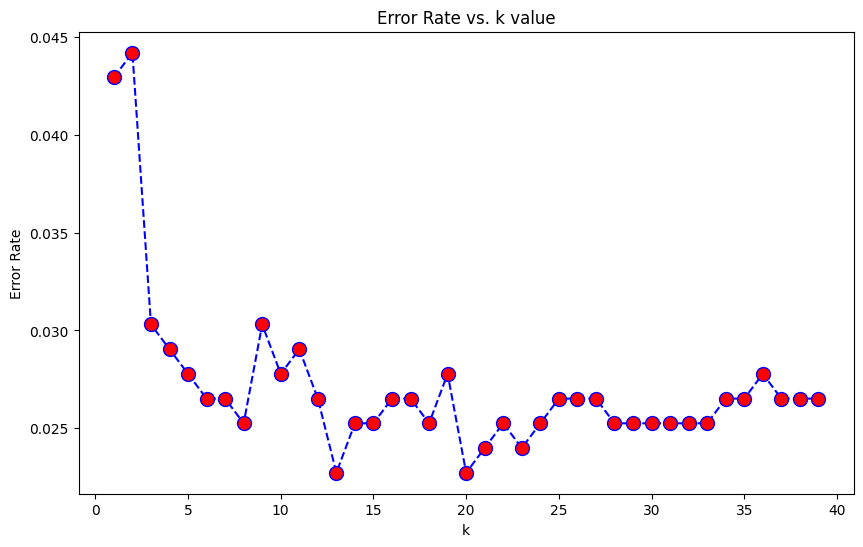

In [3]:
error_rate = []
for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate,color = 'blue', linestyle = 'dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. k value')
plt.xlabel('k')
plt.ylabel('Error Rate')

min_error = error_rate.index(min(error_rate)) + 1
print("Minimum error", min(error_rate), "is achieved with k value of", min_error)

4 Define a function and include the following operations inside the function:
   - Define a classifier
   - Fit the data for the classifier
   - Calculate minimum and maximum values for boundaries for meanfun and IQR
   - Run predictions
   - Draw a chart from predicted data utilising previously defined colormaps

Utilise your function and call it using the optimal k value chosen previously.

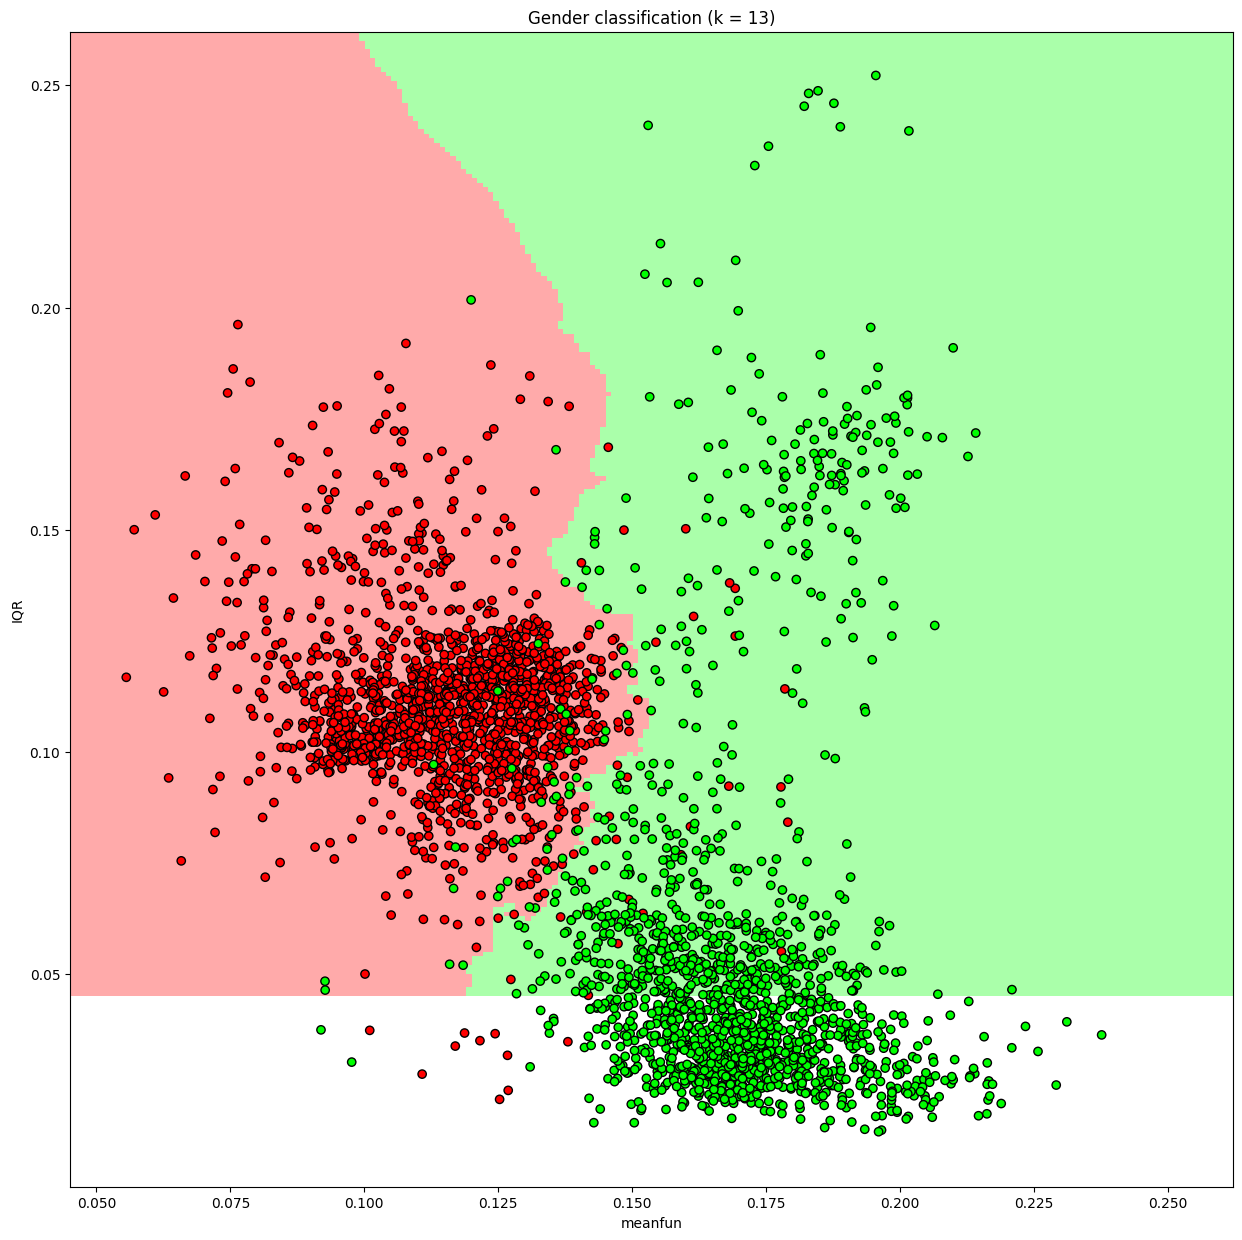

In [4]:
n_neighbors = min_error


clf = neighbors.KNeighborsClassifier(n_neighbors, metric = "euclidean")


clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.01, X[:, 1].max() + 0.01
y_min, y_max = X[:, 0].min() - 0.01, X[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

bg_colors = ListedColormap(["#FFAAAA", "#AAFFAA"])
p_colors = ListedColormap(["#FF0000", "#00FF00"])


Z = Z.reshape(xx.shape)
plt.figure(figsize = (15,15))
plt.pcolormesh(xx, yy, Z, cmap = bg_colors)


plt.scatter(X[:, 0], X[:, 1], c = y, cmap = p_colors, edgecolors = 'black')
plt.xlabel("meanfun")
plt.ylabel("IQR")
plt.title("Gender classification (k = %i)" % (n_neighbors))
plt.show()